<a href="https://colab.research.google.com/github/alimoorreza/CS167-sp25-notes/blob/main/Day09_Evaluation_Metrics_and_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS167: Day09
## Metrics and Testing

#### CS167: Machine Learning, Spring 2025


📜 [Syllabus](https://analytics.drake.edu/~reza/teaching/cs167_sp25/cs167_syllabus_sp25.pdf)

In [3]:
#run this cell if you're using Colab:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import pdb

## Cross-Validation

Don't train the model on the testing data!

<div>
<img src="https://analytics.drake.edu/~reza/teaching/cs167_sp25/notes/images/day04_cross_validation.png" width=400/>
</div>

## Cross-Validation Code:

A good rule of thumb is that we like to train our model with 80% of the given data examples (training set), and test it on 20% of the given data examples (training set).

Splitting datasets into training and testing sets with a Pandas DataFrame:

## Let's see how accurate our kNN model is:

Start with loading the data and setting up some cross-validation:

In [4]:
import pandas as pd
import numpy as np
iris = pd.read_csv('/content/drive/MyDrive/cs167_sp25/datasets/irisData.csv')

#shuffle the iris "sampling" the full set in random order
shuffled_data = iris.sample(frac=1, random_state=41)

# set up training and testing set
number_of_test_samples = 20
test_data = shuffled_data.iloc[0:number_of_test_samples] #test on the first 20 rows of shuffled
train_data = shuffled_data.iloc[number_of_test_samples:] #train on the rest
train_data.shape

(130, 5)

Then, let's bring in our `kNN()` function--here I'm calling it `classify_kNN()` becuase it uses `mode()` to return the prediction which only works for classifcation.

In [ ]:
def classify_kNN(new_example,train_data,k):
    #getting a copy of the training set just so we don't
    #mess up the original
    train_data_copy = train_data.copy()
    train_data_copy['distance_to_new'] = numpy.sqrt(
        (new_example['petal length']-train_data_copy['petal length'])**2
        +(new_example['sepal length']-train_data_copy['sepal length'])**2
        +(new_example['petal width']-train_data_copy['petal width'])**2
        +(new_example['sepal width']-train_data_copy['sepal width'])**2)

    sorted_data = train_data_copy.sort_values(['distance_to_new'])
    #mode to get most common thing in the first k examples in the sorted dataframe
    #iloc to get the actual string, mode will return the string inside of a pandas Series
    prediction = sorted_data.iloc[0:k]['species'].mode().iloc[0]
    return prediction

Now, let's write a function `classify_all_kNN(test_data, train_data,k):` that:
- goes through each example in the `test_data`, and gets the prediction using our `kNN()` function
- It will return a pandas `Series` that has the predictions for each row in `test_data`.

It should look something like this:

In [ ]:
def classify_all_kNN(test_data,train_data, k):
    #apply the classify_kNN function to each item in the test data with the train
    #data and k passed as the other two arguments. The result will be a series of
    #the individual results.

    results = []

    for i in range(len(test_data)):
        prediction = classify_kNN(test_data.iloc[i], train_data,k)
        results.append(prediction)

    return pd.Series(results)

Next, let's write a function for accuracy that will compare the actual species with the predicted species and return the percent we got correct.

In [ ]:
def calculate_accuracy(actual, predicted):
    #get the series comparing the two series: actual and predicted
    total_samples       = len(actual)               # Or since both series (actual and predicted) are of the same length, you could also do: total_samples = len(predicted)
    compared            = actual == predicted  # find which rows are of of the same value (eg, for IrisData it could be: 'Iris-setosa' == 'Iris-setosa' or 'Iris-virginica' == 'Iris-virginica', etc)
    #print(compared)
    condition_correct   = compared == True

    correct_predictions = compared[ condition_correct ] # keep only those rows from 'compared'
    num_correct         = len(correct_predictions)      # count the size
    frac_correct        = num_correct/total_samples

    return frac_correct


Now, let's pull it all together and see how our kNN does:

In [ ]:
import numpy

# Step 1: find the classification labels for all the samples in the test split using let's say k=11
k               = 11
predictionsKNN  = classify_all_kNN(test_data, train_data, k)

#Step 2: display the actual label and this will print out our predictions so we can see
print(f"{'ACTUAL':<{20}} {'PREDICTIONS':<{20}}")
for i in range(20):
  actual_sample     = test_data['species'].iloc[i]
  predicted_sample  = predictionsKNN.iloc[i]
  print(f"{actual_sample:<{20}} {predicted_sample:<{20}}")

# Step 3: calculate the evaluation metric 'accuracy' as we are doing ML classification
acc = calculate_accuracy(test_data['species'].reset_index(drop=True),
                         predictionsKNN.reset_index(drop=True))

print("accuracy:", acc)

ACTUAL               PREDICTIONS         
Iris-virginica       Iris-virginica      
Iris-virginica       Iris-virginica      
Iris-virginica       Iris-virginica      
Iris-versicolor      Iris-versicolor     
Iris-virginica       Iris-virginica      
Iris-versicolor      Iris-versicolor     
Iris-virginica       Iris-virginica      
Iris-versicolor      Iris-versicolor     
Iris-virginica       Iris-virginica      
Iris-virginica       Iris-virginica      
Iris-virginica       Iris-virginica      
Iris-setosa          Iris-setosa         
Iris-setosa          Iris-setosa         
Iris-versicolor      Iris-versicolor     
Iris-setosa          Iris-setosa         
Iris-virginica       Iris-virginica      
Iris-setosa          Iris-setosa         
Iris-versicolor      Iris-virginica      
Iris-setosa          Iris-setosa         
Iris-setosa          Iris-setosa         
accuracy: 0.95


Putting everything together

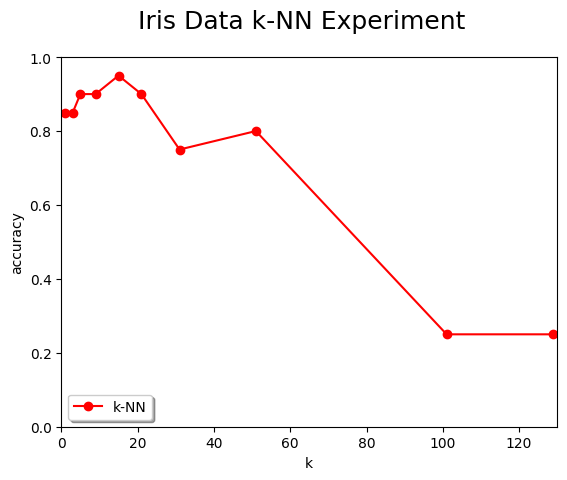

In [ ]:
import matplotlib.pyplot as plt
import pandas
# from sklearn.metrics import accuracy_score      # DON'T USE THIS FOR THE GROUP ACTIVITY; HOWEVER, YOU CAN USE IT FOR YOUR ASSIGNMENT.
# from sklearn.metrics import mean_absolute_error # DON'T USE THIS FOR THE GROUP ACTIVITY; HOWEVER, YOU CAN USE IT FOR YOUR ASSIGNMENT.
# from sklearn.metrics import mean_squared_error  # DON'T USE THIS FOR THE GROUP ACTIVITY; HOWEVER, YOU CAN USE IT FOR YOUR ASSIGNMENT.

#reload the data
data            = pd.read_csv('/content/drive/MyDrive/cs167_sp25/datasets/irisData.csv') #change this line to point to your data

# cross-validation to create 'train' and 'test' partitions
shuffled_data           = data.sample(frac=1, random_state = 41)
number_of_test_samples  = 20
test_data               = shuffled_data.iloc[0:number_of_test_samples] #test on the first 20 rows of shuffled
train_data              = shuffled_data.iloc[number_of_test_samples:] #train on the rest

# find the classification labels for all the samples in the test split using a series of k values
k_vals          = [1,3,5,9,15,21,31,51,101,129]
kNN_accuracies  = []

for k in k_vals:
    predictions       = classify_all_kNN(test_data,train_data,k)
    #acc              = accuracy_score(test_data['species'],predictions)
    acc               = calculate_accuracy(test_data['species'].reset_index(drop=True), predictions)
    kNN_accuracies.append(acc)

# plot the accuracy for each k-value to visualize the evolution of different parameter settings for k
# Use your code snippet from last week
plt.suptitle('Iris Data k-NN Experiment',fontsize=18)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_vals,kNN_accuracies,'ro-',label='k-NN')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,130,0,1])

plt.show()

## 💬 Group Exercise:

Write a function that takes in two Series and returns the Mean Absolute Error:

__Mean Absolute Error (MAE)__: the average difference between the actual and predicted target values.

<div>
<img src="https://analytics.drake.edu/~reza/teaching/cs167_sp25/notes/images/day04_mae.png", width=400/>
</div>


In [5]:
import numpy as np
np.absolute(-19)

19

In [6]:
np.mean([1, 2, 3])

2.0

In [7]:
def calculate_mae(actual, predicted):
    """
    takes in two Series of the same length, and returns the mean absolute error between the two series
    Hint: It's a lot simpler than you may think.
    """
    mean_abs_error = -1000
    # your code here
    # ...
    # ...

    return mean_abs_error


How can you test your code to make sure it's working correctly?
> Test your mae implementation using the following snippet

In [9]:

actual      = pd.Series(data=[10, 20, 30, 40, 50])
predicted   = pd.Series(data=[11, 22, 33, 44, 55])
mae         = calculate_mae(actual, predicted)
print(mae)

3.0


Now try to do kNN_regression using vehicle dataset

In [10]:
vehicle = pd.read_csv('/content/drive/MyDrive/cs167_sp25/datasets/vehicles.csv')
pd.set_option('display.max_columns', 100)
#vehicle.head()
# cleanup the vehicle data since it contains NaN
subset_rows = vehicle[vehicle.fuelType == "Regular"]
subset_data = subset_rows[['displ', 'cylinders', 'year', 'comb08']]
clean_data = subset_data.copy()
columns_with_any_na = subset_data.isna().any()
column_names_with_na = columns_with_any_na.index
for cur_column_name in column_names_with_na:
  if columns_with_any_na[cur_column_name] == True:
    avg_value = clean_data[cur_column_name].mean()
    clean_data[cur_column_name].fillna(avg_value, inplace=True)
print('clean_data.shape: ', clean_data.shape)
data = clean_data
data.head()

clean_data.shape:  (26863, 4)


<ipython-input-10-b23db7b1c85c>:1: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  vehicle = pd.read_csv('/content/drive/MyDrive/cs167_sp25/datasets/vehicles.csv')
<ipython-input-10-b23db7b1c85c>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clean_data[cur_column_name].fillna(avg_value, inplace=True)


,displ,cylinders,year,comb08
0,2.0,4.0,1985,21
1,4.9,12.0,1985,11
2,2.2,4.0,1985,27
3,5.2,8.0,1985,11
5,1.8,4.0,1993,22


In [14]:
def regress_kNN(new_example,train_data,k):
    #getting a copy of the training set just so we don't
    train_data_copy = train_data.copy()
    train_data_copy['distance_to_new'] = np.sqrt(
        (new_example['displ']-train_data_copy['displ'])**2
        +(new_example['cylinders']-train_data_copy['cylinders'])**2
        +(new_example['year']-train_data_copy['year'])**2)

    sorted_data = train_data_copy.sort_values(['distance_to_new'])
    #mode to get most common thing in the first k examples in the sorted dataframe
    #iloc to get the actual string, mode will return the string inside of a pandas Series

    # REZA NOTE: PLEASE TRY TO THINK WHAT NEEDS TO BE DONE IN ORDER CONVERT THIS EXISTING CLASSIFICATION TASK INTO A REGRESSION TASK
    prediction = sorted_data.iloc[0:k]['comb08'].mode()[0]




    return prediction

In [16]:
def regress_all_kNN(test_data,train_data, k):
    #apply the regress_kNN function to each item in the test data with the train
    #data and k passed as the other two arguments. The result will be a series of
    #the individual results.

    results = []

    for i in range(len(test_data)):
        prediction = regress_kNN(test_data.iloc[i], train_data,k)
        results.append(prediction)

    return pd.Series(results)

In [ ]:
# do the regression experiment on 'vehicle' dataset

# step 1: cross-validation to create 'train' and 'test' partitions from vehicle
shuffled_data           = data.sample(frac=1, random_state = 41)
number_of_test_samples  = 20
test_data               = shuffled_data.iloc[0:number_of_test_samples] #test on the first 20 rows of shuffled
train_data              = shuffled_data.iloc[number_of_test_samples:] #train on the rest

# step 2: find the classification labels for all the samples in the test split using a series of k values
k_vals          = [1,3,5,9,15,21,31,51,101,129]
kNN_maes        = []

for k in k_vals:
    test_predictions  = regress_all_kNN(test_data,train_data,k)
    test_true_labels  = test_data['comb08'].reset_index(drop=True) # Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
    mae               = calculate_mae(test_true_labels, test_predictions)
    kNN_maes.append(mae)
    print("mae=:", mae)

# step 3: plot the accuracy for each k-value to visualize the evolution of different parameter settings for k
# copy the code snippet from plot section above and adjust it by using the correct list
# your code here
# ...
# ...
# ...


#plt.axis([0,130,0,1]) # HEADS-UP: FIX THE CORRECT RANGE
#plt.show()


# plot the accuracy for each k-value to visualize the evolution of different parameter settings for k
# Use your code snippet from last week



# **Please write down the names of your collaborators for this group activity.**